# Assignment 2 - Question 3: Tree-based Models 
**Course Name:** Machine Learning (DDA3020)

(30 points in total)

<font color=Red>*Please enter your personal information (Double-click this block first)*</font>

**Name:** Zhu Chenming

**Student ID:**  123090918

### Overview

In this question, you will use three tree-based models (Decision Tree, Bagging, and Random Forest) to solve a real problem, image classification. The tasks includes training models by different parameters, comparing the results of different models, and trying to find the best parameter combination. As a part of an assignment, your task is to **run all codes in this script and complete the parts marked with** <font color=Red>\[TASK\]</font>.

### Dataset Introduction

Since we will use a same dataset for both question 3 & 4, it's important to have an overall knowledge of this dataset. The dataset is called **Fashion-MNIST**, a member of the MNIST family, but I think it's more interesting. This dataset is an image classification task with ten categories, all of which are items from our daily lives. It consists of a training set of 60,000 examples and a test set of 10,000 examples. Each example is a 28x28 grayscale image. It means that we can use 784 numbers (in the range of 0~255) to represent one image. More details can be found in https://github.com/zalandoresearch/fashion-mnist.

OK. Now it's time to start, please read and run each block of codes in order, so that you will have a smooth experience.

In [1]:
import numpy as np
import gzip
import random
import os
import pandas as pd
import matplotlib.pyplot as plt

# Please do not modify the seed number here.
np.random.seed(336)

Don't need to carefully read this block since it's just loading the dataset. Just run it.

In [10]:
def load_mnist(path, kind, subset=None):
    labels_path = os.path.join(path, '%s-labels-idx1-ubyte.gz' % kind)
    images_path = os.path.join(path, '%s-images-idx3-ubyte.gz' % kind)
    with gzip.open(labels_path, 'rb') as lbpath:
        labels = np.frombuffer(lbpath.read(), dtype=np.uint8, offset=8)
    with gzip.open(images_path, 'rb') as imgpath:
        images = np.frombuffer(imgpath.read(), dtype=np.uint8, offset=16).reshape(len(labels), 784)

    if subset is not None:
        selected_images, selected_labels = [], []
        for label in range(10):
            indices = np.where(labels == label)[0]
            selected_indices = np.random.choice(indices, subset, replace=False)
            selected_images.append(images[selected_indices])
            selected_labels.append(labels[selected_indices])
        images = np.concatenate(selected_images, axis=0)
        labels = np.concatenate(selected_labels, axis=0)

        paired = list(zip(images, labels))
        random.shuffle(paired)
        images, labels = zip(*paired)

    return np.array(images), np.array(labels)

In this question, we only use a subset of Fashion-MNIST dataset to reduce compuration time.

In [17]:
X_train, y_train = load_mnist('./data/', kind='train', subset=100)
X_test, y_test = load_mnist('./data/', kind='t10k', subset=20)

You can repeat running this block for several times to see different images with its label in this dataset.

The label index of this image is: 5
The label name of this graph is: Sandal


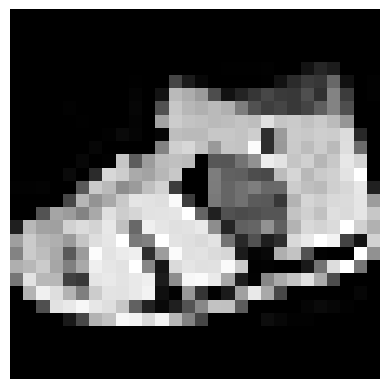

In [20]:
label_names = ["T-shirt/top", "Trouser", "Pullover", "Dress", "Coat", "Sandal", "Shirt", "Sneaker", "Bag", "Ankle boot"]
idx = random.choice(range(0, len(X_test)))
print(f"The label index of this image is: {y_test[idx]}")
print(f"The label name of this graph is: {label_names[y_test[idx]]}")

plt.imshow(X_test[idx].reshape(28, 28), cmap='gray')
plt.axis('off')
plt.show()

In this question, we use each pixel to represent different features of a data sample. It means that each sample will have 784 features to learn and 1 label to predict. The advantage is that you don't need to struggle on data processing but focus on training models and analyzing results.

In [14]:
X_train = pd.DataFrame(X_train, columns=[f"pixel_{i}" for i in range(X_train.shape[1])])
X_test = pd.DataFrame(X_test, columns=[f"pixel_{i}" for i in range(X_test.shape[1])])

In both question 3 & 4, we only use one metric, **accuracy_score**. Here is a simple example about how to use this function from sklearn.

In [15]:
from sklearn.metrics import accuracy_score

_y_true = [0, 1, 1, 2, 0]
_y_pred = [1, 1, 2, 2, 0]
accuracy_score(_y_true, _y_pred)

0.6

### Task 1
Write code to train Decision Tree Classification models with different **max_depth** (=1,2,...,9). Save the accuracy scores of **both** predicting train data and test data respectively in train_acc_dt and test_acc_dt. (For further analysis) <font color=Red>\[TASK\]</font> (5 points)

Max Depth = 1: Train Accuracy = 0.2000, Test Accuracy = 0.2000
Max Depth = 2: Train Accuracy = 0.3660, Test Accuracy = 0.3600
Max Depth = 3: Train Accuracy = 0.5230, Test Accuracy = 0.5000
Max Depth = 4: Train Accuracy = 0.6750, Test Accuracy = 0.6450
Max Depth = 5: Train Accuracy = 0.7530, Test Accuracy = 0.7050
Max Depth = 6: Train Accuracy = 0.8110, Test Accuracy = 0.7200
Max Depth = 7: Train Accuracy = 0.8630, Test Accuracy = 0.7550
Max Depth = 8: Train Accuracy = 0.9070, Test Accuracy = 0.7300
Max Depth = 9: Train Accuracy = 0.9450, Test Accuracy = 0.7150


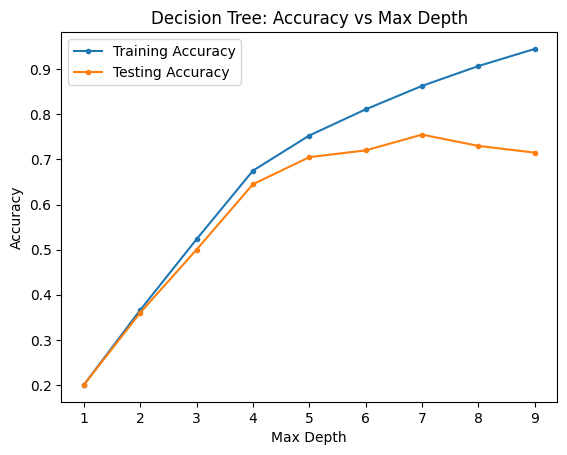

In [16]:
from sklearn.tree import DecisionTreeClassifier

train_acc_dt = []
test_acc_dt = []
depth_list = range(1, 10)

for depth in depth_list:
    # Initialize the Decision Tree model with current max_depth
    dt_model = DecisionTreeClassifier(max_depth=depth, random_state=336)

    # Train the model on training data
    dt_model.fit(X_train, y_train)

    # Make predictions on training and test data
    y_train_pred = dt_model.predict(X_train)
    y_test_pred = dt_model.predict(X_test)

    # Calculate accuracy scores
    train_accuracy = accuracy_score(y_train, y_train_pred)
    test_accuracy = accuracy_score(y_test, y_test_pred)

    # Append accuracy scores to the lists
    train_acc_dt.append(train_accuracy)
    test_acc_dt.append(test_accuracy)

    # Print results for each depth (optional)
    print(f"Max Depth = {depth}: Train Accuracy = {train_accuracy:.4f}, Test Accuracy = {test_accuracy:.4f}")

plt.plot(depth_list, train_acc_dt, marker=".", label='Training Accuracy')
plt.plot(depth_list, test_acc_dt, marker=".", label='Testing Accuracy')
plt.xlabel('Max Depth')
plt.ylabel('Accuracy')
plt.title('Decision Tree: Accuracy vs Max Depth')
plt.legend()
plt.show()

Here you will have a graph about accuracy scores of both train data and test data. **Please write your observations and findings here.** <font color=Red>\[TASK\]</font> (3 points)

Your answer:
## Observations and Findings

1. **Training Accuracy Trend**:
   - The training accuracy consistently increases as the max depth increases from 1 to 9
   - Starting at around 0.2 at depth 1, it rises rapidly until depth 4-5, then continues to increase at a slower rate
   - By depth 9, the training accuracy reaches over 0.9 (90%)

2. **Testing Accuracy Trend**:
   - Testing accuracy also increases initially, following a similar pattern to training accuracy up to depth 4
   - From depth 4 to 7, testing accuracy continues to improve but at a slower rate
   - The peak testing accuracy occurs around depth 7 (approximately 0.75 or 75%)
   - After depth 7, testing accuracy begins to decline, dropping to around 0.71 by depth 9

3. **Overfitting Indication**:
   - The growing gap between training and testing accuracy as depth increases indicates overfitting
   - This is particularly evident after depth 7, where training accuracy continues to rise while testing accuracy decreases
   - The model is memorizing the training data rather than learning generalizable patterns

4. **Optimal Depth**:
   - Based on this graph, the optimal max_depth parameter appears to be around 7
   - At this point, we achieve the highest testing accuracy while minimizing overfitting
   - This represents the best balance between model complexity and generalization ability

5. **Model Complexity Trade-off**:
   - Simpler models (depths 1-3) underfit the data, showing poor performance on both training and testing sets
   - More complex models (depths 8-9) overfit the training data and perform worse on unseen data

This analysis demonstrates the classic bias-variance tradeoff in machine learning, where we need to find the right model complexity that generalizes well to new data.

### Task 2
Write code to train Random Forest Classification models with different **max_depth** (=1,2,...,9). Save the accuracy scores of **both** predicting train data and test data respectively in train_acc_rf and test_acc_rf. (For further analysis) <font color=Red>\[TASK\]</font> (5 points)

Max Depth = 1: Train Accuracy = 0.4230, Test Accuracy = 0.3950
Max Depth = 2: Train Accuracy = 0.5990, Test Accuracy = 0.5900
Max Depth = 3: Train Accuracy = 0.7630, Test Accuracy = 0.7000
Max Depth = 4: Train Accuracy = 0.7880, Test Accuracy = 0.7150
Max Depth = 5: Train Accuracy = 0.8390, Test Accuracy = 0.7050
Max Depth = 6: Train Accuracy = 0.9000, Test Accuracy = 0.7700
Max Depth = 7: Train Accuracy = 0.9470, Test Accuracy = 0.7800
Max Depth = 8: Train Accuracy = 0.9760, Test Accuracy = 0.7800
Max Depth = 9: Train Accuracy = 0.9920, Test Accuracy = 0.7900


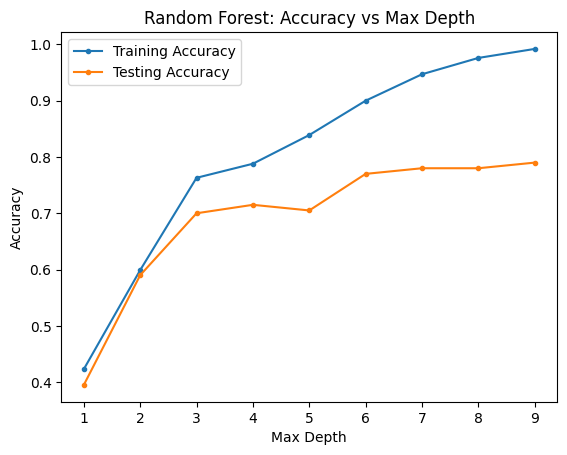

In [21]:
from sklearn.ensemble import RandomForestClassifier

train_acc_rf = []
test_acc_rf = []
depth_list = range(1, 10)

for depth in depth_list:
    # Initialize the Random Forest model with current max_depth
    rf_model = RandomForestClassifier(max_depth=depth, n_estimators=100, random_state=336)

    # Train the model on training data
    rf_model.fit(X_train, y_train)

    # Make predictions on training and test data
    y_train_pred = rf_model.predict(X_train)
    y_test_pred = rf_model.predict(X_test)

    # Calculate accuracy scores
    train_accuracy = accuracy_score(y_train, y_train_pred)
    test_accuracy = accuracy_score(y_test, y_test_pred)

    # Append accuracy scores to the lists
    train_acc_rf.append(train_accuracy)
    test_acc_rf.append(test_accuracy)

    # Print results for each depth (optional)
    print(f"Max Depth = {depth}: Train Accuracy = {train_accuracy:.4f}, Test Accuracy = {test_accuracy:.4f}")

plt.plot(depth_list, train_acc_rf, marker=".", label='Training Accuracy')
plt.plot(depth_list, test_acc_rf, marker=".", label='Testing Accuracy')
plt.xlabel('Max Depth')
plt.ylabel('Accuracy')
plt.title('Random Forest: Accuracy vs Max Depth')
plt.legend()
plt.show()

Here you will have a graph about accuracy scores of both train data and test data. **Try to compare this graph with the above one (Decision Tree's graph), and write your observations and findings here.** <font color=Red>\[TASK\]</font> (3 points)

Your answer:
1. **Overall Performance**:
   - Random Forest achieves higher test accuracy (peaking around 0.78-0.79) compared to Decision Tree (peaking around 0.75)
   - The Random Forest model maintains better test accuracy at higher depths (8-9) while Decision Tree's performance degrades

2. **Overfitting Behavior**:
   - Both models show increasing gaps between training and testing accuracy as depth increases
   - However, Random Forest exhibits less severe overfitting at higher depths
   - Decision Tree shows a clear decline in test accuracy after depth 7, while Random Forest's test accuracy continues to slightly improve or stabilize

3. **Training Accuracy Patterns**:
   - Random Forest reaches higher training accuracy overall
   - Both models show similar training accuracy patterns up to depth 3
   - Random Forest's training accuracy increases more steadily toward 1.0

4. **Generalization Ability**:
   - Random Forest maintains a more consistent test performance across different depths (especially 6-9)
   - Decision Tree shows more volatility in test performance as depth increases

5. **Optimal Depth**:
   - For Decision Tree, the optimal max_depth appears to be around 7
   - For Random Forest, depths 7-9 all perform similarly well on test data, with a slight advantage to depth 9
   - Random Forest is more forgiving of parameter selection, showing stable performance across higher depth values

6. **Model Complexity Trade-off**:
   - Both models underfit at low depths (1-2)
   - Random Forest handles increased model complexity better, maintaining generalization ability even at higher depths
   - This demonstrates Random Forest's built-in resistance to overfitting through its ensemble approach

This comparison highlights why Random Forest is often preferred over single Decision Trees for complex classification tasks - it provides better generalization, higher accuracy, and more robustness to parameter selection while reducing overfitting.

### Task 3
Write code to train **both Bagging and Random Forest** Classification models with different **n_estimators** (=10,20,50,100). Save the accuracy scores of predicting test data for both models respectively in bagging_test_acc and rf_test_acc. (For further analysis) <font color=Red>\[TASK\]</font> (5 points)

n_estimators = 10:
  Bagging Test Accuracy: 0.7200
  Random Forest Test Accuracy: 0.7350
n_estimators = 20:
  Bagging Test Accuracy: 0.7450
  Random Forest Test Accuracy: 0.7500
n_estimators = 50:
  Bagging Test Accuracy: 0.7550
  Random Forest Test Accuracy: 0.7750
n_estimators = 100:
  Bagging Test Accuracy: 0.7500
  Random Forest Test Accuracy: 0.7850


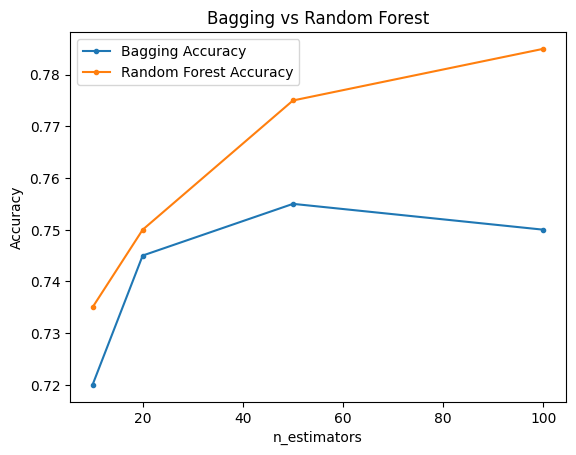

In [26]:
from sklearn.ensemble import BaggingClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.tree import DecisionTreeClassifier

n_estimators_list = [10, 20, 50, 100]
bagging_test_acc = []
rf_test_acc = []

# Loop through different n_estimators values
for n_est in n_estimators_list:
    # Initialize Bagging model with Decision Tree as base estimator
    # Using base_estimator instead of estimator
    bagging_model = BaggingClassifier(
        base_estimator=DecisionTreeClassifier(random_state=336),
        n_estimators=n_est,
        random_state=336
    )

    # Initialize Random Forest model
    rf_model = RandomForestClassifier(
        n_estimators=n_est,
        random_state=336
    )

    # Train both models
    bagging_model.fit(X_train, y_train)
    rf_model.fit(X_train, y_train)

    # Make predictions on test data
    bagging_pred = bagging_model.predict(X_test)
    rf_pred = rf_model.predict(X_test)

    # Calculate and store test accuracy
    bagging_accuracy = accuracy_score(y_test, bagging_pred)
    rf_accuracy = accuracy_score(y_test, rf_pred)

    bagging_test_acc.append(bagging_accuracy)
    rf_test_acc.append(rf_accuracy)

    # Print results (optional)
    print(f"n_estimators = {n_est}:")
    print(f"  Bagging Test Accuracy: {bagging_accuracy:.4f}")
    print(f"  Random Forest Test Accuracy: {rf_accuracy:.4f}")

plt.plot(n_estimators_list, bagging_test_acc, marker=".", label='Bagging Accuracy')
plt.plot(n_estimators_list, rf_test_acc, marker=".", label='Random Forest Accuracy')
plt.xlabel('n_estimators')
plt.ylabel('Accuracy')
plt.title('Bagging vs Random Forest')
plt.legend()
plt.show()

Here you will have a graph about accuracy scores of both models. **Please write your observations and findings here.** <font color=Red>\[TASK\]</font> (3 points)

Your answer:
1. **Overall Performance**:
   - Random Forest consistently outperforms Bagging across all tested n_estimators values
   - The performance gap between the two models widens as the number of estimators increases

2. **Scaling with Estimators**:
   - Random Forest shows continuous improvement as n_estimators increases from 10 to 100
   - Bagging initially improves from 10 to 50 estimators, but then plateaus and slightly decreases from 50 to 100 estimators

3. **Optimal Configuration**:
   - For Random Forest, the highest accuracy (approximately 0.785) is achieved with 100 estimators
   - For Bagging, the peak accuracy (approximately 0.755) occurs at 50 estimators

4. **Efficiency Considerations**:
   - Random Forest with just 20 estimators already outperforms Bagging's best result (at 50 estimators)
   - This suggests Random Forest is more efficient at extracting useful patterns from the data

5. **Diminishing Returns**:
   - Bagging shows diminishing returns after 50 estimators, with performance actually declining slightly
   - Random Forest continues to benefit from additional estimators, though the rate of improvement slows after 50 estimators

6. **Feature Selection Impact**:
   - The superior performance of Random Forest likely stems from its feature randomization strategy
   - By considering random subsets of features at each split, Random Forest creates more diverse trees that collectively capture more aspects of the data

This comparison demonstrates why Random Forest is often preferred over basic Bagging in practice - it achieves higher accuracy with the same computational resources by introducing additional randomization in the feature selection process.

### Task 4
Write code to find the best parameter combination from **\[n_estimators=50/100/200, max_depth=5/10/20/50\]** by 4-fold cross validation. Please use GridSearchCV from sklearn to implement that. Output the best parameter combination and the test accuracy score with the best parameters. <font color=Red>\[TASK\]</font> (6 points)

In [27]:
from sklearn.model_selection import GridSearchCV
from sklearn.ensemble import RandomForestClassifier

# Define the parameter grid to search
param_grid = {
    'n_estimators': [50, 100, 200],
    'max_depth': [5, 10, 20, 50]
}

# Create a Random Forest classifier
rf = RandomForestClassifier(random_state=336)

# Set up GridSearchCV with 4-fold cross-validation
grid_search = GridSearchCV(
    estimator=rf,
    param_grid=param_grid,
    cv=4,  # 4-fold cross-validation
    scoring='accuracy',
    n_jobs=-1,  # Use all available cores
    verbose=1
)

# Fit the grid search to the data
grid_search.fit(X_train, y_train)

# Get the best parameters
best_params = grid_search.best_params_

# Get the best model
best_model = grid_search.best_estimator_

# Evaluate the best model on the test set
test_accuracy = best_model.score(X_test, y_test)

print("Best params:", best_params)
print("Test Accuracy with Best Model: ", test_accuracy)

Fitting 4 folds for each of 12 candidates, totalling 48 fits
Best params: {'max_depth': 10, 'n_estimators': 100}
Test Accuracy with Best Model:  0.785
